Question 1 - Import libraries

In [1]:
# Import essential libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For better visualization
from sklearn.model_selection import train_test_split  # To split data
from sklearn.ensemble import RandomForestClassifier  # ML algorithm
from sklearn.preprocessing import LabelEncoder, MinMaxScaler  # Encoding & Scaling
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Evaluation Metrics


Question 2 - Import Dataset

In [2]:
# Load dataset
df = pd.read_csv("/content/breast-cancer.csv")  # Change path if needed

# Display first 5 rows
print(df.head())


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

Question 3 - Determine X and Y variables

In [3]:
# Identify target variable
y = df['diagnosis']  # Target: 'diagnosis' (0 = Malignant, 1 = Benign)

# Encode the target variable (if it's categorical)
le = LabelEncoder()
y = le.fit_transform(y)

# Identify feature variables (drop 'diagnosis' column)
X = df.drop(columns=['diagnosis'])

# Feature scaling using MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

Question 4

In [4]:
# Print dataset information
print("\nBreast Cancer Dataset Information:")
print(f"Number of samples: {df.shape[0]}")
print(f"Number of features: {df.shape[1] - 1}")  # Exclude the target column
print(f"Number of malignant tumors (class 0): {(y == 0).sum()}")
print(f"Number of benign tumors (class 1): {(y == 1).sum()}")



Breast Cancer Dataset Information:
Number of samples: 569
Number of features: 31
Number of malignant tumors (class 0): 357
Number of benign tumors (class 1): 212


Question 5 - Fit the dataset

In [5]:
# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Show training output
print("\nModel Training Completed!")


Model Training Completed!


Question 6

In [6]:
# Predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Calculate Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Print Accuracy
print(f"\nAccuracy on the training subset: {train_acc:.3f}")
print(f"Accuracy on the testing subset: {test_acc:.3f}")


Accuracy on the training subset: 1.000
Accuracy on the testing subset: 0.965


Question 7 - Insights


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



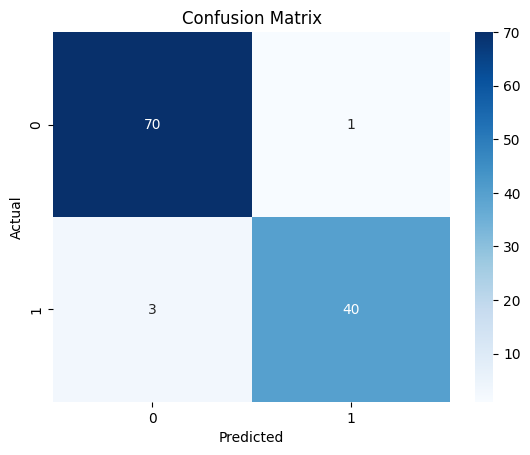

In [7]:
# Print Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Question 8 - Plot a bar graph

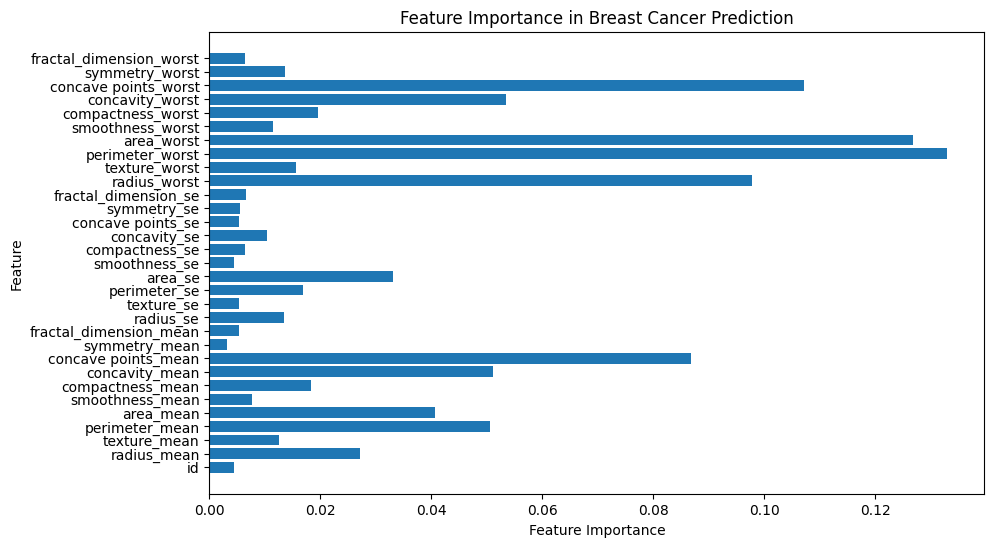

In [8]:
# Get the number of features
n_features = X.shape[1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(n_features), rf_model.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X.columns)  # Use column names from DataFrame
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Breast Cancer Prediction')
plt.show()
